In [170]:
#os.chdir("D:\\05-massive")

In [1]:
from modules import grid
from modules import images
import numpy as np
from matplotlib import pyplot as plt

C:\Users\wjmn\Anaconda3\envs\bmedsc\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\wjmn\Anaconda3\envs\bmedsc\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\wjmn\Anaconda3\envs\bmedsc\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\wjmn\Anaconda3\envs\bmedsc\lib\site-packages\tensorflow\python\f

In [2]:
test_grid = grid.load("./grids/G-2019-10-02-12-11-02-814521.pkl")

In [3]:
new_grid = grid.CartesianGrid(24, 24, 48, 48, True, False)

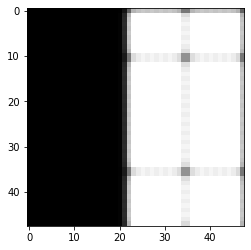

In [4]:
plt.imshow(test_grid.render_values_array(np.array([1 for i in range(24*24)])), cmap='gray')

# Slides

In [96]:
#polar_grid = grid.load("./grids/G-2019-09-03-23-49-08-827480.pkl")
#polar_grid = TRAINING_CONFIG.grid
polar_grid = grid.CartesianGrid(8, 8, 48, 48, True, False)

In [97]:
        volume = np.array([
            polar_grid.prerender_square(
                x=x,
                y=y,
                x_render=48,
                y_render=48,
                x_size=x_size,
                y_size=y_size,
                strength=strength,
            )
            for (
                (x, y),
                (x_size, y_size),
                strength
            ) in zip(
                polar_grid.locations,
                polar_grid.sizes,
                polar_grid.strengths
            )
        ])


In [98]:
        # Multiply the values with the renders and sum
        summed = sum(volume)

        # Clip, then scale between -1 and 1
        clipped = np.clip(summed, 0, 1) * 2 - 1


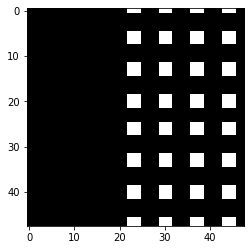

In [99]:
plt.imshow(clipped, cmap='gray')

In [52]:
config.grid

AttributeError: module 'modules.config' has no attribute 'grid'

In [53]:
plt.imshow(polar_grid.render_values_array(np.array([1 for i in range(64)])))

ValueError: cannot reshape array of size 64 into shape (144,1,1)

```
    "config_id": "C-2019-09-03-21-55-22-433369",
    "decoder_id": "D-2019-08-08-17-39-45-872686",
    "encoder_id": "E-2019-09-03-11-17-55-838746",
    "filler_id": "F-2019-07-18-13-57-00-000000",
    "grid_id": "G-2019-09-03-11-49-38-734916",
```

    "C-2019-09-03-21-14-34-365488"

In [56]:
mnist = images.Mnist()

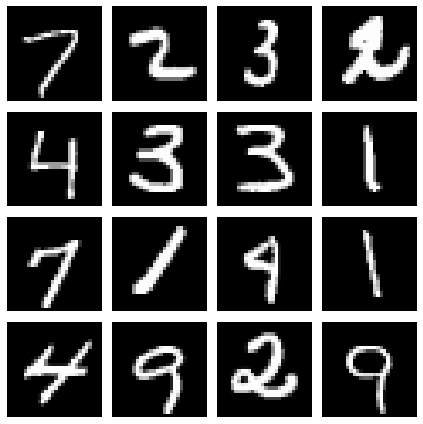

In [57]:
fig, ax = plt.subplots(4, 4, figsize=(6, 6))
for i in range(4):
    for y in range(4):
        ax[i, y].imshow(mnist.images[4*i+y], cmap='gray')
        ax[i, y].axis('off')
plt.tight_layout()
fig.savefig("../thesis/images/mnist_samples.png")

In [58]:
mnist.preprocess_for_grid(polar_grid)

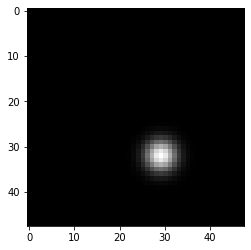

In [77]:
plt.imshow(polar_grid.volume[57], cmap='gray', vmin=0, vmax=1)

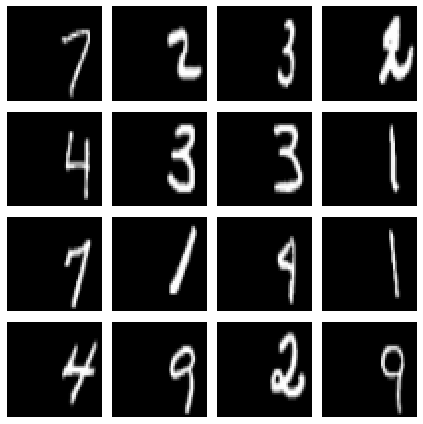

In [59]:
fig, ax = plt.subplots(4, 4, figsize=(6, 6))
for i in range(4):
    for y in range(4):
        ax[i, y].imshow(mnist.images[4*i+y], cmap='gray')
        ax[i, y].axis('off')
plt.tight_layout()
fig.savefig("../thesis/images/mnist_samples.png")

(-0.5, 27.5, 27.5, -0.5)

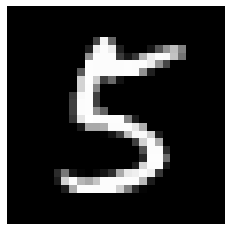

In [11]:
plt.imshow(mnist.images[2], cmap='gray')
plt.axis('off')

In [12]:
from modules import config

In [149]:
#TRAINING_CONFIG = config.Config.load(".", "C-2019-09-03-21-14-34-365488")
TRAINING_CONFIG = config.Config.load(".", "C-2019-08-28-00-59-31-436936")

In [137]:
import tensorflow as tf

In [160]:
LEARNING_RATE_ENCODER = TRAINING_CONFIG.learning_rate_encoder
LEARNING_RATE_DECODER = TRAINING_CONFIG.learning_rate_decoder
ENCODER_OPTIMISER = tf.keras.optimizers.Adam(learning_rate=LEARNING_RATE_ENCODER)
DECODER_OPTIMISER = tf.keras.optimizers.Adam(learning_rate=LEARNING_RATE_DECODER)

CHECKPOINT = tf.train.Checkpoint(
    encoder=TRAINING_CONFIG.encoder,
    decoder=TRAINING_CONFIG.decoder,
    encoder_optimiser=ENCODER_OPTIMISER,
    decoder_optimiser=DECODER_OPTIMISER,
)

CHECKPOINT_NUM = 3

CHECKPOINT_TEMPLATE = f'./output/{TRAINING_CONFIG.config_id}/checkpoints/checkpoint_-{CHECKPOINT_NUM}'
CHECKPOINT.restore(CHECKPOINT_TEMPLATE)

encoder = CHECKPOINT.encoder

W1009 10:11:54.827115 17880 util.py:244] Unresolved object in checkpoint: (root).decoder_optimiser.iter
W1009 10:11:54.827115 17880 util.py:244] Unresolved object in checkpoint: (root).decoder_optimiser.beta_1
W1009 10:11:54.827115 17880 util.py:244] Unresolved object in checkpoint: (root).decoder_optimiser.beta_2
W1009 10:11:54.827115 17880 util.py:244] Unresolved object in checkpoint: (root).decoder_optimiser.decay
W1009 10:11:54.842736 17880 util.py:244] Unresolved object in checkpoint: (root).decoder_optimiser.learning_rate
W1009 10:11:54.842736 17880 util.py:244] Unresolved object in checkpoint: (root).encoder_optimiser.iter
W1009 10:11:54.842736 17880 util.py:244] Unresolved object in checkpoint: (root).encoder_optimiser.beta_1
W1009 10:11:54.842736 17880 util.py:244] Unresolved object in checkpoint: (root).encoder_optimiser.beta_2
W1009 10:11:54.842736 17880 util.py:244] Unresolved object in checkpoint: (root).encoder_optimiser.decay
W1009 10:11:54.842736 17880 util.py:244] Unre

In [142]:
[print(x) for x in list(encoder(in_all).numpy()[0][1:10])]

InvalidArgumentError: Incompatible shapes: [1,100] vs. [10] [Op:Mul] name: model/batch_normalization/batchnorm/mul/

(-0.5, 47.5, 47.5, -0.5)

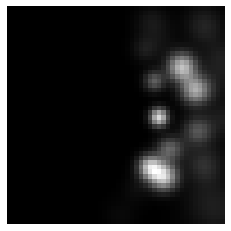

In [152]:
result = TRAINING_CONFIG.grid.render_values_array(encoder(np.array([[0]])).numpy()[0])

plt.imshow(result, cmap='gray')
plt.axis('off')

In [163]:
#one_hot_input = tf.one_hot([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], depth=10)
one_hot_input = np.array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])
result_list = tf.map_fn(TRAINING_CONFIG.grid.render_values_tensor, encoder(one_hot_input))
filled = filler(result_list).numpy()

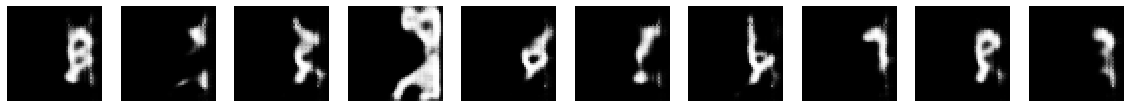

In [166]:
fig, ax = plt.subplots(1, 10, figsize=(20, 2))

for i in range(10):
    ax[i].imshow(filled[i], cmap='gray')
    ax[i].axis('off')

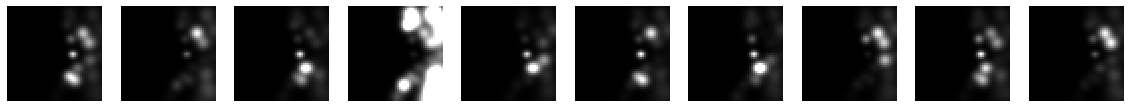

In [167]:
fig, ax = plt.subplots(1, 10, figsize=(20, 2))

for i in range(10):
    ax[i].imshow(result_list[i], cmap='gray')
    ax[i].axis('off')

In [110]:
one_hot_input = tf.one_hot(2, depth=10)

In [111]:
in_all = tf.expand_dims(one_hot_input, axis=0)

In [112]:
result_list = tf.map_fn(TRAINING_CONFIG.grid.render_values_tensor, encoder(in_all))

In [113]:
round(0.1, ndigits=2)

0.1

In [114]:
dec_probs = [3493, 24, 53, 2, 4, 33, 49, 20, 39, 40, 4902]
m = sum(dec_probs)
dec_probs = [round(i/m, ndigits=5) for i in dec_probs]
[print(str(i) + " | " + str(x)) for i ,x in enumerate(dec_probs)]

0 | 0.4034
1 | 0.00277
2 | 0.00612
3 | 0.00023
4 | 0.00046
5 | 0.00381
6 | 0.00566
7 | 0.00231
8 | 0.0045
9 | 0.00462
10 | 0.56612


[None, None, None, None, None, None, None, None, None, None, None]

In [115]:
import os

In [116]:
filler =    tf.keras.models.load_model(
                os.path.join(
                    '.',
                    'models',
                    'trained',
                    'fillers',
                    'F-2019-07-18-13-57-00-000000' + '.h5'
                )
            )


W1009 09:10:26.263128 17880 hdf5_format.py:171] No training configuration found in save file: the model was *not* compiled. Compile it manually.


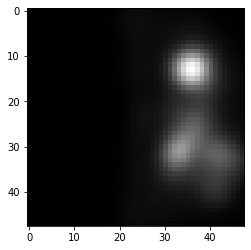

In [117]:
plt.imshow(result_list.numpy()[0], cmap='gray')

(-0.5, 47.5, 47.5, -0.5)

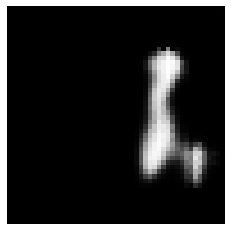

In [118]:
plt.imshow(filler(result_list).numpy()[0], cmap='gray')
plt.axis('off')

In [185]:
import glob
import PIL

In [207]:
os.chdir("C:\\Users\\wjmn\\Documents\\gifables\\64_03")

generated_images = glob.glob("./" + ("*.png"))
images = [PIL.Image.open(image) for image in generated_images]

# save the first image 10 times
images[0].save("./sum.gif",
               save_all=True,
               append_images=[images[0]] * 10 + images + [images[-1]]*10,
               duration=100,
               loop=0)

In [209]:
def plot_loss(logpath):
    fig, ax = plt.subplots(1, figsize=(10, 7))
    
    enc_logpath = logpath + "\\encoder_losses.log"
    dec_logpath = logpath + "\\decoder_losses.log"
    
    with open(enc_logpath) as infile:
        enc_loss_raw = infile.readlines()
        
    with open(dec_logpath) as infile:
        dec_loss_raw = infile.readlines()

    enc_loss_data = np.array(list(map(float, enc_loss_raw)))
    dec_loss_data = np.array(list(map(float, dec_loss_raw)))

    plt.plot(range(enc_loss_data.shape[0]), enc_loss_data, color='teal', label='Loss for encoder training')
    plt.plot(range(dec_loss_data.shape[0]), dec_loss_data, color='tomato', label='Loss for decoder training')
    plt.ylabel("Categorical Cross Entropy Loss")
    plt.xlabel("Training Batch (each containing 500 images)")
    plt.title("Training Optimiser Loss over Epochs")
    plt.legend()

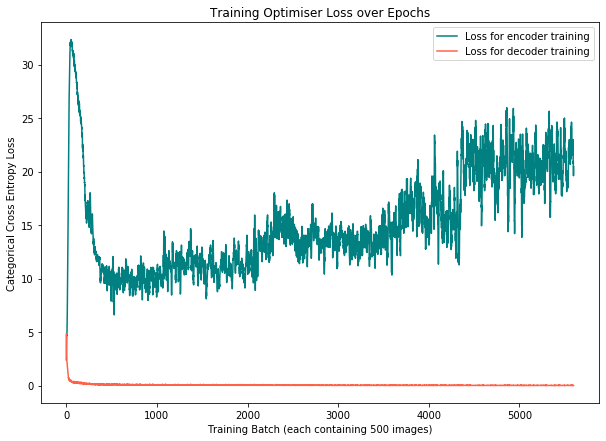

In [210]:
plot_loss("D:\\05-massive\\output\\C-2019-09-04-13-24-57-304507")